## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
pd.set_option("display.precision", 2)
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame.merge(mouse_metadata, study_results)

#simplify name
df = merged_data

# Display the data table for preview
df.head()

#check value counts
df['Mouse ID'].value_counts()

# looks like g89 has 3 duplicated values


g989    13
j365    10
m957    10
q597    10
b879    10
        ..
d133     1
o848     1
x336     1
l872     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [2]:
# count number of unique mice

df_uniq = df.sort_values('Mouse ID')
df_uniq = df_uniq.drop_duplicates(subset='Mouse ID', keep='first')

num_unique_mice = df_uniq['Mouse ID'].count()

print (f"There were {num_unique_mice} mice used in this experiment")

There were 249 mice used in this experiment


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# actually the vaue_counts number above showed which mic were duplicate. 
#I had done this anlysis before realizing that so left i in.

df_sorted = df.sort_values(by=['Mouse ID', 'Timepoint'])

#identify duplicated rows
dupes = df_sorted[df_sorted.duplicated(['Mouse ID', 'Timepoint'])]

#after looking at the above results, g989 had duplicated data. (as shown in values.count result)
duplicated_mouse_data = df[df['Mouse ID'] == 'g989']

#removed all rows for mouse g989.  Not sure if we should just remove the duplicated rows,
#but instructions seemd to say get rid of all data for that mouse
filtered_df = df[df['Mouse ID'] != 'g989']

#see how many unique mie are now in the expriment

new_df_uniq = filtered_df.drop_duplicates(subset='Mouse ID', keep='first')

new_unique_mice = new_df_uniq['Mouse ID'].count()

#check that the right number of rows, and only one unique mouse were removed

original_num = df['Mouse ID'].value_counts().sum()   
num_dups = dupes['Mouse ID'].value_counts().sum()
num_dup_rows = duplicated_mouse_data['Mouse ID'].value_counts().sum()
filtered_num = filtered_df['Mouse ID'].value_counts().sum()

print (f"There were originally {num_unique_mice} mice used in this experiment")
print (f"After dups removed there are {new_unique_mice} mice represented in the data")

print(f"original total of observations = {original_num}")
print(f"number duplicated rows identified = {num_dups}")
print(f"number of rows from the problem mouse (g989) = {num_dup_rows}")
print(f"number of observations remaining after g989 removed = {filtered_num}")


There were originally 249 mice used in this experiment
After dups removed there are 248 mice represented in the data
original total of observations = 1893
number duplicated rows identified = 5
number of rows from the problem mouse (g989) = 13
number of observations remaining after g989 removed = 1880


## Summary Statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

clean = filtered_df
drugs = clean['Drug Regimen'].value_counts()

clean_uniq = clean.sort_values('Drug Regimen')
drugs = clean_uniq.drop_duplicates(subset='Drug Regimen', keep='first')

#make a list of drugs
reg = [drug for drug in drugs['Drug Regimen']]

#group data frame by drug regimen 
gby_regimen = clean.groupby('Drug Regimen')

#make a list of each decriptive statistic
means = [stat for stat in gby_regimen['Tumor Volume (mm3)'].mean()]
medians = [stat for stat in gby_regimen['Tumor Volume (mm3)'].median()]
stds = [stat for stat in gby_regimen['Tumor Volume (mm3)'].std()]
vars = [stat for stat in gby_regimen['Tumor Volume (mm3)'].var()]
sems = [stat for stat in gby_regimen['Tumor Volume (mm3)'].sem()]

# Make a dictionary with appropriate column names and corresponding list of values
stats_dict = {'Drug': reg, 
              'Mean':means,
              'Median': medians, 
              'St. Dev':stds, 
              'Variance': vars,
              'SEM': sems}

stats_dict_df = pd.DataFrame(stats_dict)
stats_dict_df.style.set_caption("Descriptive Statistics for Tumor Volume Following Various Drug Treatments")

    

,Drug,Mean,Median,St. Dev,Variance,SEM
0,Capomulin,40.68,41.56,4.99,24.95,0.33
1,Ceftamin,52.59,51.78,6.27,39.29,0.47
2,Infubinol,52.88,51.82,6.57,43.13,0.49
3,Ketapril,55.24,53.70,8.28,68.55,0.60
4,Naftisol,54.33,52.51,8.13,66.17,0.60
5,Placebo,54.03,52.29,7.82,61.17,0.58
6,Propriva,52.32,50.45,6.62,43.85,0.54
7,Ramicane,40.22,40.67,4.85,23.49,0.32
8,Stelasyn,54.23,52.43,7.71,59.45,0.57
9,Zoniferol,53.24,51.82,6.97,48.53,0.52


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen




In [6]:
# Using the aggregation method, produce the same summary statistics in a single line
gby_regimen.agg({'Tumor Volume (mm3)': ['mean','median', 'std', 'var', 'sem']})

# I found this method on my own after many googles, then read the instructions.  I'm seeing a pattern.



Tumor Volume (mm3)                          
                           mean median   std    var   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  4.99  24.95  0.33
Ceftamin                  52.59  51.78  6.27  39.29  0.47
Infubinol                 52.88  51.82  6.57  43.13  0.49
Ketapril                  55.24  53.70  8.28  68.55  0.60
Naftisol                  54.33  52.51  8.13  66.17  0.60
Placebo                   54.03  52.29  7.82  61.17  0.58
Propriva                  52.32  50.45  6.62  43.85  0.54
Ramicane                  40.22  40.67  4.85  23.49  0.32
Stelasyn                  54.23  52.43  7.71  59.45  0.57
Zoniferol                 53.24  51.82  6.97  48.53  0.52

## Bar and Pie Charts

C:\Users\ksaville\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Number of measurements'),
 Text(0.5, 0, 'Drug'),
 Text(0.5, 1.0, 'The number of tumor measurements for each drug treatment')]

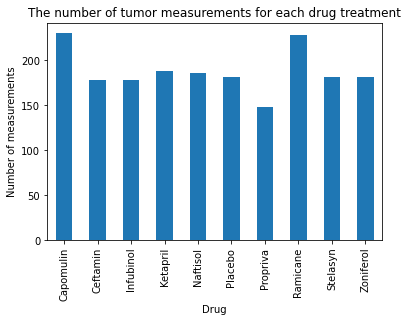

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean.rename(columns = {"Tumor Volume (mm3)" : "Volume"}, inplace =True)

gby_drug = clean.groupby(['Drug Regimen'])

ax = gby_drug['Volume'].count().plot(kind='bar')

ax.set(xlabel='Drug', ylabel='Number of measurements', title = 'The number of tumor measurements for each drug treatment' )


Text(0.5, 1.0, 'The number of tumor measurements for each drug treatment')

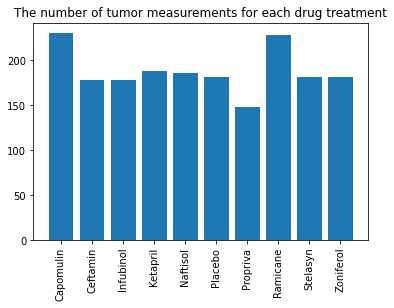

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
data = gby_drug['Volume'].count()

data = data.reset_index()
data

plt.bar(data['Drug Regimen'], data['Volume'])
plt.xticks(rotation='vertical')
plt.title('The number of tumor measurements for each drug treatment')
#plt.bar(names, values)



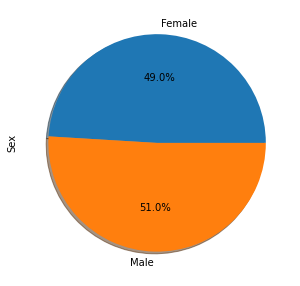

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean.groupby(['Sex'])
sex_count = sex['Sex'].count()
sex_count.plot(kind='pie', shadow = True, figsize=(5,5), autopct='%1.1f%%')



Text(0.5, 1.0, 'sex')

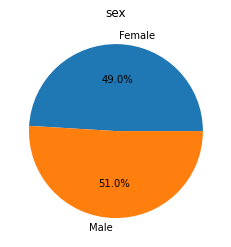

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean.groupby(['Sex'])
sex_count = sex['Mouse ID'].count().reset_index()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = sex_count['Sex']
sizes = sex_count['Mouse ID']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("sex")



#sex_count




## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_df = clean[clean['Timepoint'] == max(clean['Timepoint'])]
new_df['Mouse ID'].value_counts().sum()

#new_df.head(n=50)  - looks good.  ALl time points are 45.



130

In [46]:
# Put treatments into a list for for loop (and later for plot labels)

#treatment_list.  Adding placebo for later comparisons

treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin', 'Placebo']

#extract data for each drug treatment as separate lists (series?)
cap = new_df[new_df['Drug Regimen'] == 'Capomulin']
ram = new_df[new_df['Drug Regimen'] == 'Ramicane']
inf = new_df[new_df['Drug Regimen'] == 'Infubinol']
cef = new_df[new_df['Drug Regimen'] == 'Ceftamin']
pla = new_df[new_df['Drug Regimen'] == 'Placebo']

#add above lists to a dictionary for easy reference
volumes = {'Capomulin':cap['Volume'],
           'Ramicane':ram['Volume'],
           'Infubinol': inf['Volume'], 
           'Ceftamin' : cef['Volume'],
          'Placebo' : pla['Volume']}

#Calculate IQR and outliers
outliers = 0
for treatment in treatments:
    
    first = np.percentile(volumes[treatment], 25)
    third = np.percentile(volumes[treatment], 75)
    IQR = round(third-first,2)
    upper = third + 1.5*IQR
    lower = first - 1.5*IQR
    #print(upper)
    #print(lower)
    
    for value in volumes[treatment]:
        if value < lower or value > upper:
            outliers +=1
            
print(f"looks like there are {outliers} outliers across all four treatments")

    

looks like there are 0 outliers across all four treatments


Text(0.5, 1.0, 'Ceftamin')

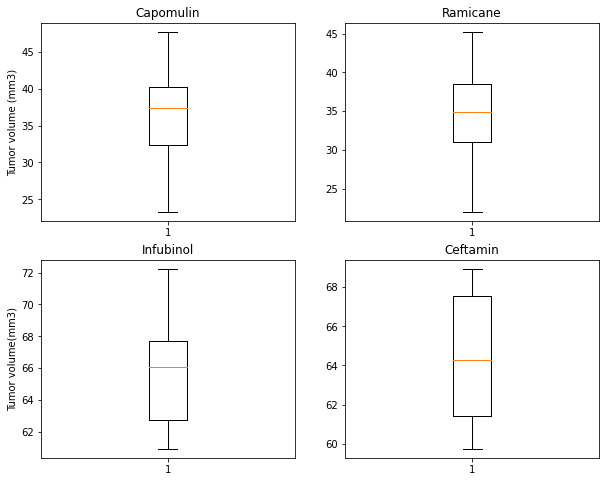

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,8))

# first subplot
plt.subplot(2, 2, 1)
plt.boxplot(volumes['Capomulin']) 
plt.title("Capomulin")
plt.ylabel("Tumor volume (mm3)")

# second subplot
plt.subplot(2, 2, 2)
plt.boxplot(volumes['Ramicane']) 
plt.title("Ramicane")

# third subplot
plt.subplot(2, 2, 3)
plt.boxplot(volumes['Infubinol']) 
plt.title("Infubinol")
plt.ylabel("Tumor volume(mm3)")

# fourth subplot
plt.subplot(2, 2, 4)
plt.boxplot(volumes['Ceftamin']) 
plt.title("Ceftamin")


Text(0.5, 1.0, 'Capomulin and Ramicane treatment reduce tumor volume ')

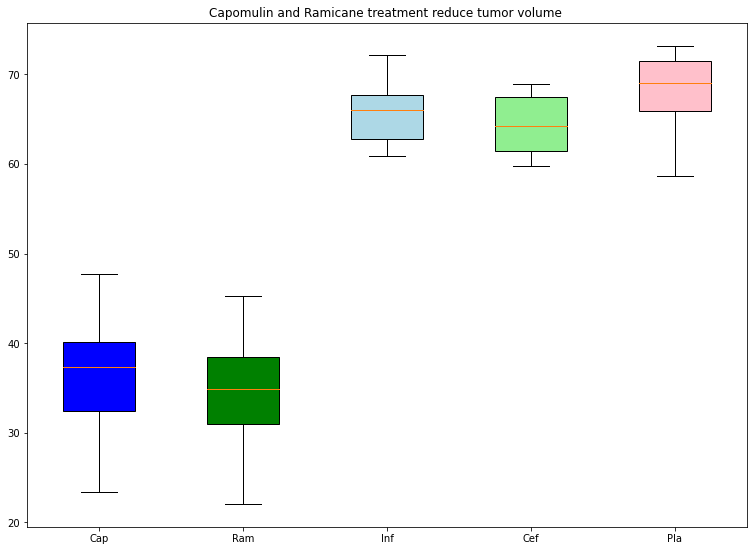

In [53]:
#I think a direct comparison, including the placebo is more informative

data_1 = volumes['Capomulin']
data_2 = volumes['Ramicane']
data_3 = volumes['Infubinol']
data_4 = volumes['Ceftamin']
data_5 = volumes['Placebo']

data = [data_1, data_2, data_3, data_4, data_5] 

fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data, patch_artist = True)


# fill with colors - not quite sure how this works, just trying things from google searches
colors = ['blue', 'green', 'lightblue', 'lightgreen', 'pink' ]

for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

ax.set_xticklabels(['Cap', 'Ram',  
                    'Inf', 'Cef', 'Pla']) 

plt.title("Capomulin and Ramicane treatment reduce tumor volume ") 
  

## Line and Scatter Plots

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
